In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
   # for filename in filenames:
       # print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
#the imports
import random
import matplotlib.pyplot as plt
import keras.backend as K
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Flatten, Convolution2D, MaxPooling2D, Dropout, Activation, AveragePooling2D
from keras.preprocessing import image
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline
import cv2

In [27]:
men = []
women = []
img_size = 300
MEN_IMGS_PATH = '../input/gender-classification-dataset/Training/male'
WOMEN_IMGS_PATH = '../input/gender-classification-dataset/Training/female'
print('Mens:',len(os.listdir(MEN_IMGS_PATH)))
print('Womens:',len(os.listdir(WOMEN_IMGS_PATH)))

DIRS = [(0, MEN_IMGS_PATH), (1, WOMEN_IMGS_PATH)]

Mens: 23766
Womens: 23243


In [28]:
train_dir='../input/gender-classification-dataset/Training'
a=os.listdir(train_dir)
print(a)

['male', 'female']


../input/gender-classification-dataset/Training/male
(105, 82, 3)
../input/gender-classification-dataset/Training/female
(104, 84, 3)


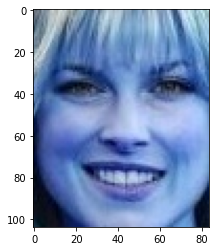

In [29]:

for i in a:
    b=os.path.join(train_dir,i)
    print(b)
    c=os.listdir(os.path.join(train_dir,i))
    for j in c:
        d=os.path.join(b,j)
        img=cv2.imread(d)
        print(img.shape)
        
        plt.imshow(img)
        break

# Appending the images into a list
 changing the size of the image to 300.
 dividing each pixel by 255(Normalize)
 Here we only used 1000 images from each category


In [30]:
train_images = []
labels = []
for num, _dir in DIRS:
    _dir = _dir + '/'
    count = 0
    for file in os.listdir(_dir):
        if count==1000:
            break
        img = image.load_img(_dir + str(file), target_size=(img_size, img_size))
        img = image.img_to_array(img)
        img = img/255
        train_images.append(img)
        labels.append(num)
        count += 1

In [31]:
len(train_images)

2000

In [32]:
train_images[1].shape

(300, 300, 3)

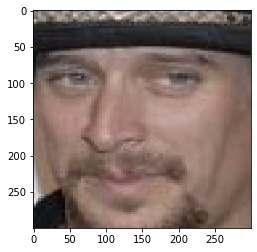

In [33]:
plt.imshow(train_images[4])

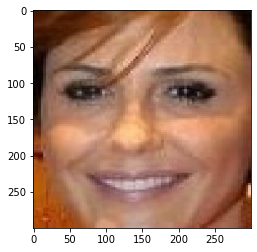

In [34]:
plt.imshow(train_images[1510])

In [35]:
len(train_images)

2000

In [36]:
X = np.array(train_images)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.1, random_state=101)
print(X_train.shape)
print(X_test.shape)


(1800, 300, 300, 3)
(200, 300, 300, 3)


In [38]:
len(X_train)

1800

In [39]:
len(X_test)

200

In [40]:
y_train_labels = to_categorical(y_train)
print(y_train_labels.shape)

(1800, 2)


In [41]:
def build(width, height, depth, classes):
    #initialize the model along with the input shape
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (depth, height, width)
        chanDim = 1
        
    # CONV -> RELU -> MAXPOOL
    model.add(Convolution2D(64, (3,3), padding='same', input_shape=inputShape))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # (CONV -> RELU)*2 -> AVGPOOL
    model.add(Convolution2D(128, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Convolution2D(128, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(AveragePooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # CONV -> RELU -> MAXPOOL
    model.add(Convolution2D(256, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # CONV -> RELU -> AVGPOOL
    model.add(Convolution2D(512, (3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis=chanDim))
    model.add(AveragePooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))
    
    # DENSE -> RELU
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    # DENSE -> RELU
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    # sigmoid -> just to check the accuracy with this (softmax would work too)
    model.add(Dense(classes))
    model.add(Activation('sigmoid'))
    
    return model

In [42]:
model = build(img_size, img_size, 3, 2)

In [43]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 300, 300, 64)      1792      
_________________________________________________________________
activation_9 (Activation)    (None, 300, 300, 64)      0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 300, 300, 64)      256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 128)     73856     
_________________________________________________________________
activation_10 (Activation)   (None, 100, 100, 128)    

# Training The Model

In [45]:
history = model.fit(X_train, y_train_labels, batch_size=16, epochs=20, validation_split=0.2)

Train on 1440 samples, validate on 360 samples
Epoch 1/20
1440/1440 [==============================] - 15s 10ms/step - loss: 0.8441 - accuracy: 0.6267 - val_loss: 0.8052 - val_accuracy: 0.5222
Epoch 2/20
1440/1440 [==============================] - 13s 9ms/step - loss: 0.6044 - accuracy: 0.7278 - val_loss: 0.6339 - val_accuracy: 0.6347
Epoch 3/20
1440/1440 [==============================] - 13s 9ms/step - loss: 0.4905 - accuracy: 0.7847 - val_loss: 0.4433 - val_accuracy: 0.8125
Epoch 4/20
1440/1440 [==============================] - 13s 9ms/step - loss: 0.4150 - accuracy: 0.8205 - val_loss: 1.1812 - val_accuracy: 0.6236
Epoch 5/20
1440/1440 [==============================] - 13s 9ms/step - loss: 0.3930 - accuracy: 0.8333 - val_loss: 0.3566 - val_accuracy: 0.8375
Epoch 6/20
1440/1440 [==============================] - 13s 9ms/step - loss: 0.3433 - accuracy: 0.8594 - val_loss: 0.3045 - val_accuracy: 0.8819
Epoch 7/20
1440/1440 [==============================] - 13s 9ms/step - loss: 0.306

# Plotting Accuracy

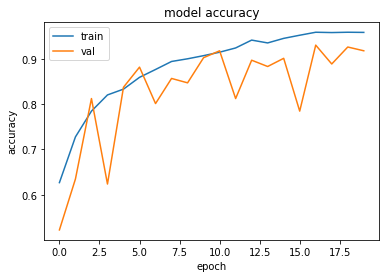

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Plotting Loss

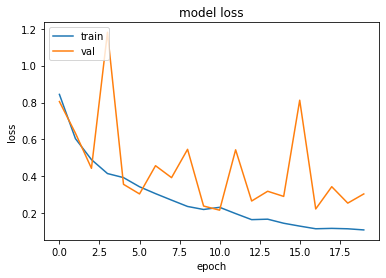

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Evaluate the Model

In [48]:
predictions = model.predict_classes(X_test)
print(predictions)

[1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 1
 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1
 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0]


# Confusion Matrix

In [49]:
print(confusion_matrix(predictions, y_test))

[[ 75   8]
 [  9 108]]


In [50]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        83
           1       0.93      0.92      0.93       117

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200



In [54]:
random_indices = [random.randint(0, 200) for i in range(9)]

# plotting the images with predictions

197
123
92
84
154
164
0
126
114


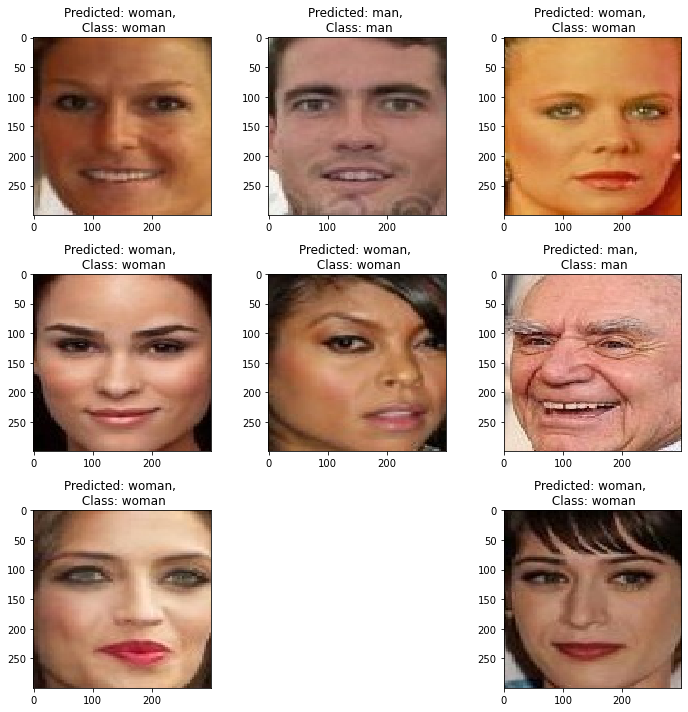

In [55]:
plt.figure(figsize=(10,10))
for i, index in enumerate(random_indices):
    print(index)
    pred = predictions[index]
    pred = 'man' if pred==0 else 'woman'
    actual = 'man' if y_test[index]==0 else 'woman'
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[index], cmap='gray', interpolation='none',)
    plt.title(f"Predicted: {pred}, \n Class: {actual}")
    plt.tight_layout()